<a href="https://colab.research.google.com/github/tsuganeanju/AIprogramming/blob/main/AI%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0_20N3051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


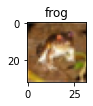

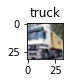

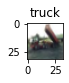

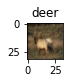

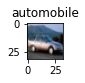

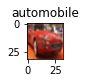

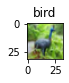

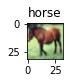

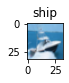

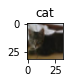

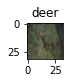

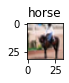

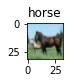

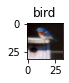

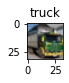

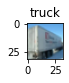

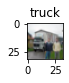

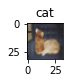

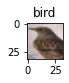

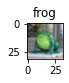

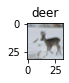

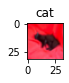

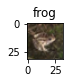

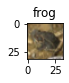

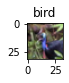

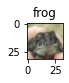

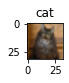

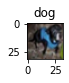

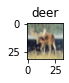

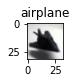

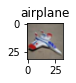

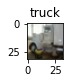

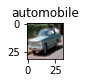

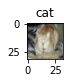

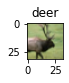

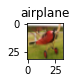

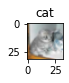

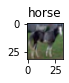

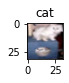

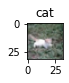

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
plt.figure (figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
"horse", "ship", "truck"]
for i in range (0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot (5, 8, i + 1)
    plt.title (labels [y_train [i] [0]])
    plt.tick_params (labelbottom="off", bottom="off") # x軸をオフ
    plt.tick_params (labelleft="off",left="off") # y軸をオフ
    plt.imshow (im)
    plt.show()

Epoch 1/50
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8770 - accuracy: 0.3318 - val_loss: 1.7321 - val_accuracy: 0.3682
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6946 - accuracy: 0.3954 - val_loss: 1.6313 - val_accuracy: 0.4177
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6322 - accuracy: 0.4181 - val_loss: 1.6395 - val_accuracy: 0.4189
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5893 - accuracy: 0.4355 - val_loss: 1.5774 - val_accuracy: 0.4373
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5584 - accuracy: 0.4460 - val_loss: 1.5901 - val_accuracy: 0.4279
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5358 - accuracy: 0.4524 - val_loss: 1.5471 - val_accuracy: 0.4497
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5207 - accuracy: 0.4565 - val_loss: 1.5334 - val_accuracy:

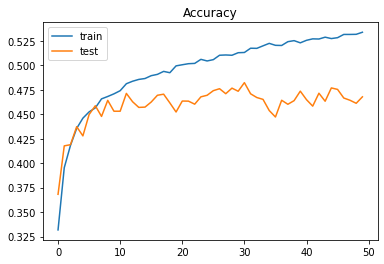

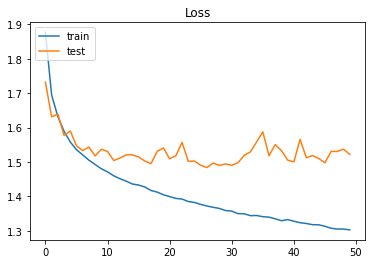

In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential

num_classes = 10
im_rows = 32
im_cols = 32
im_size=im_rows* im_cols * 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(-1,im_size).astype('float32')/ 255
X_test = X_test.reshape(-1,im_size).astype('float32')/ 255

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

hist = model.fit(X_train,y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

score = model. evaluate (X_test, y_test, verbose=1)
print('正解率 =', score [1], 'loss=', score [0])

plt.plot (hist.history ['accuracy'])
plt.plot (hist.history ['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

Epoch 1/50
1563/1563 [==============================] - 16s 6ms/step - loss: 1.5659 - accuracy: 0.4225 - val_loss: 1.1836 - val_accuracy: 0.5775
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1675 - accuracy: 0.5834 - val_loss: 0.9948 - val_accuracy: 0.6550
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0224 - accuracy: 0.6397 - val_loss: 0.8865 - val_accuracy: 0.6946
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9335 - accuracy: 0.6735 - val_loss: 0.8317 - val_accuracy: 0.7078
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8713 - accuracy: 0.6940 - val_loss: 0.7955 - val_accuracy: 0.7222
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8227 - accuracy: 0.7122 - val_loss: 0.8052 - val_accuracy: 0.7240
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7839 - accuracy: 0.7267 - val_loss: 0.7530 - val_accuracy

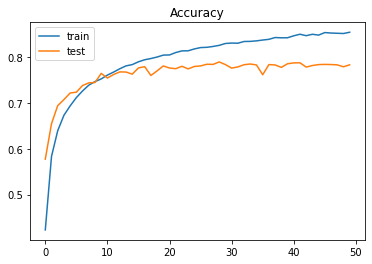

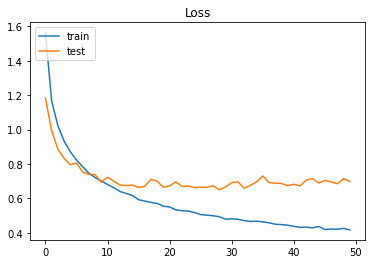

In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows,im_cols,3)

(X_train,y_train),(X_test,y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test =  X_test.astype ('float32') / 255

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)


model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add (Activation ('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation ('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation ('relu'))
model.add(Conv2D(64, (3, 3)))
model.add (Activation ('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation ('relu'))
model.add(Dropout(0.5))
model.add(Dense (num_classes))
model.add(Activation ('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

score = model. evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score [0])

plt.plot(hist.history['accuracy'])
plt.plot (hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend (['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend (['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('cifar10-weight.h5')

In [ ]:
model.load_weights('cifar10-weight.h5')

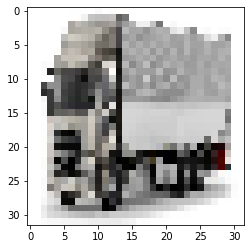

1/1 [==============================] - 0s 181ms/step
airplane = 0
automobile = 0
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 0
ship = 0
truck = 100
---
予測した結果= truck


In [ ]:
import cv2
import numpy as np
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
"horse", "ship", "truck"]
im_size= 32 * 32 * 3

model.load_weights('cifar10-weight.h5')

im = cv2.imread('track1.jpg')

im = cv2.cvtColor(im, cv2. COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow (im) 
plt.show()

im.reshape (im_size).astype ('float32') / 255

r = model.predict (np. array([im]), batch_size=32, verbose=1)
res = r[0]

for i, acc in enumerate (res):
    print (labels [i], "=", int (acc * 100))
print("---")
print("予測した結果=", labels [res.argmax ()])